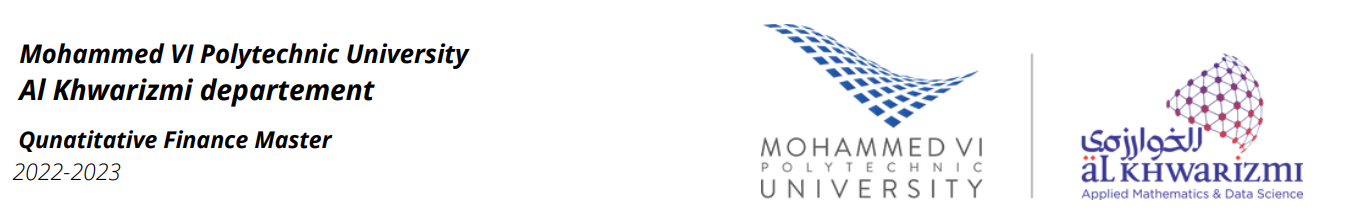

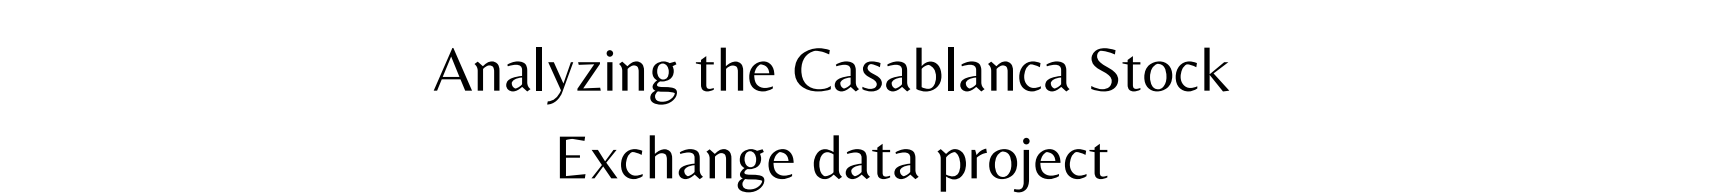

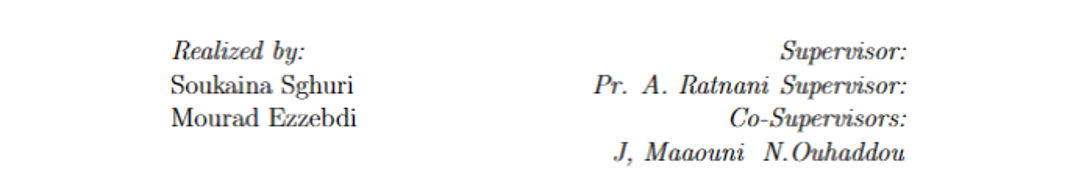

### Importing libraries

In [1]:
# import the bs4 library for use with BeautifulSoup
import bs4
# We will use BeautifulSoup to access and scrape the content of the files .aspx
from bs4 import BeautifulSoup

# import datetime for date handling
from datetime import datetime
import pandas as pd
# import warnings to ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import numpy for numerical operations on arrays
import numpy as np

# import plotly libraries for data visualization wich is insanely powerful at explaining and exploring data
import plotly.graph_objs as go
import plotly.offline as pyo

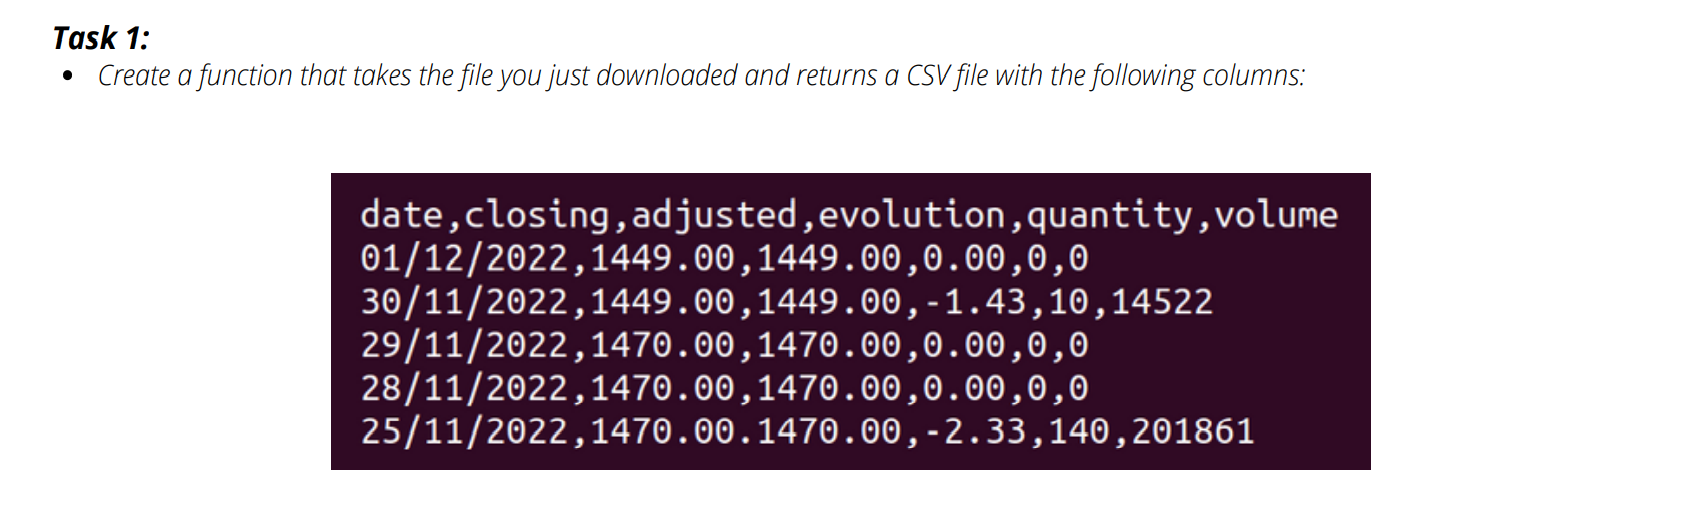

In [2]:
# Our code defines a function return_csv(path, name) that takes in two arguments:
# path: the file path of the input file or the file which we want to scrap its content
# name: the desired name of the output CSV file
def return_csv(path,name): 
    # Open the file located at path in read mode
    with open(path, 'r') as f:  
        content = f.read()
    # Create a BeautifulSoup object from the file content
    soup = BeautifulSoup(content)
    # Extract all <span> elements and store them in the variable 'data'
    data = soup.find_all("span") 
    #####################################################
    liste = []
    # Loop through the elements in 'data' and store them in 'liste' after replacing commas with periods
    for d in data:
        d = d.get_text().replace(",",".")
        liste.append(d)  
    #####################################################
    # since we have an idea about the columns of our data we create 6 empty lists
    date = []
    closing = []
    adjusted = []
    evolution = []
    quantity = []
    volume = []

    #####################################################
    # While loop to iterate through the elements in 'liste' and append them to the respective lists 
    i = 0
    while i<len(liste):
        date.append(liste[i])
        closing.append(liste[i+1])
        adjusted.append(liste[i+2])
        evolution.append(liste[i+3])
        quantity.append(liste[i+4])
        volume.append(liste[i+5])
    
        i = i+6
    #####################################################
    #Creating a dataframe from the lists
    
    df = pd.DataFrame(list(zip(date,closing,adjusted,evolution,quantity,volume)),
                  columns = ['Date','Closing','Adjusted','Evolution','Quantity','Volume'])

    ######################################################
    #Changing the type of each column
    df['Date'] = pd.to_datetime(df['Date'])
    df['Closing'] = df['Closing'].astype(float)
    df['Adjusted'] = df['Adjusted'].astype(float)
    df['Evolution'] = df['Evolution'].astype(float)
    df['Quantity'] = df['Quantity'].astype(int)
    df['Volume'] = df['Volume'].astype(float)
    #######################################################
    #Sorting data
    data = df.sort_values(by='Date',inplace=True)
    #####################################################
    # Saving dataframe to a csv file
    file = df.to_csv(r'C:/Users/21261/Desktop/Data/{}.csv'.format(name), index=False, header=True)
    # Reading the csv file
    data = pd.read_csv(r'C:/Users/21261/Desktop/Data/{}.csv'.format(name),parse_dates=['Date']) # need it in task 2
    
    return [file,data]

In [3]:
# Test
## Specifying the file path for the .aspx file
path = 'C:/Users/21261/Desktop/Data/ATTIJARIWAFA BANK.aspx'
# Specifying the name of the csv file to be created
name = 'Attijariwafabank'
# calling the return_csv function and passing the path and name as arguments
p,f = return_csv(path,name)
# printing the dataframe
f

Date  Closing  Adjusted  Evolution  Quantity       Volume
0   2020-01-04   369.95    369.95      -0.52      4322   1600019.25
1   2020-01-06   346.50    346.50       0.43     48755  16884589.00
2   2020-01-07   357.00    357.00       0.28      6276   2237357.80
3   2020-01-09   370.90    370.90       4.00     23566   8727438.00
4   2020-01-10   357.00    357.00      -0.20     25037   8938209.00
..         ...      ...       ...        ...       ...          ...
727 2022-12-05   440.00    440.00      -1.35     22682  10067146.85
728 2022-12-07   425.20    425.20       0.02     24539  10431982.80
729 2022-12-08   446.10    446.10       1.16     17161   7649183.85
730 2022-12-09   435.00    435.00      -0.46      1600    694984.35
731 2022-12-10   424.00    424.00      -1.17     24404  10361317.10

[732 rows x 6 columns]

In [5]:
# Test to verify the types of our dataframe
f.dtypes

Date         datetime64[ns]
Closing             float64
Adjusted            float64
Evolution           float64
Quantity              int64
Volume              float64
dtype: object

In [6]:
# Test 
path = "C:/Users/21261/Desktop/Data/BANK OF AFRICA.aspx"
name = 'bank_of_africa'

p,f = return_csv(path,name)
f

Date  Closing  Adjusted  Evolution  Quantity      Volume
0   2020-01-04    150.0    147.71      -3.85       125    19255.75
1   2020-01-06    136.0    133.92       0.74       210    28370.00
2   2020-01-07    140.0    137.86       0.00      6223   871295.95
3   2020-01-09    130.6    128.60       0.46     13287  1746257.40
4   2020-01-10    129.0    127.03       2.38        89    11481.00
..         ...      ...       ...        ...       ...         ...
727 2022-12-05    193.0    190.05      -1.03      1621   312969.85
728 2022-12-07    185.0    182.17       0.00      5552  1027120.00
729 2022-12-08    180.0    177.25      -1.10      9284  1665194.55
730 2022-12-09    180.0    177.25       0.00     14012  2522178.00
731 2022-12-10    175.0    175.00      -1.13      3088   540337.50

[732 rows x 6 columns]

In [7]:
# Test
path = "C:/Users/21261/Desktop/Data/BCP.aspx"
name = 'BCP'

p,df = return_csv(path,name)
f

Date  Closing  Adjusted  Evolution  Quantity      Volume
0   2020-01-04    150.0    147.71      -3.85       125    19255.75
1   2020-01-06    136.0    133.92       0.74       210    28370.00
2   2020-01-07    140.0    137.86       0.00      6223   871295.95
3   2020-01-09    130.6    128.60       0.46     13287  1746257.40
4   2020-01-10    129.0    127.03       2.38        89    11481.00
..         ...      ...       ...        ...       ...         ...
727 2022-12-05    193.0    190.05      -1.03      1621   312969.85
728 2022-12-07    185.0    182.17       0.00      5552  1027120.00
729 2022-12-08    180.0    177.25      -1.10      9284  1665194.55
730 2022-12-09    180.0    177.25       0.00     14012  2522178.00
731 2022-12-10    175.0    175.00      -1.13      3088   540337.50

[732 rows x 6 columns]

In [8]:
# Test
path = "C:/Users/21261/Desktop/Data/BMCI.aspx"
name = 'BMCI'

p,df = return_csv(path,name)
f

Date  Closing  Adjusted  Evolution  Quantity      Volume
0   2020-01-04    150.0    147.71      -3.85       125    19255.75
1   2020-01-06    136.0    133.92       0.74       210    28370.00
2   2020-01-07    140.0    137.86       0.00      6223   871295.95
3   2020-01-09    130.6    128.60       0.46     13287  1746257.40
4   2020-01-10    129.0    127.03       2.38        89    11481.00
..         ...      ...       ...        ...       ...         ...
727 2022-12-05    193.0    190.05      -1.03      1621   312969.85
728 2022-12-07    185.0    182.17       0.00      5552  1027120.00
729 2022-12-08    180.0    177.25      -1.10      9284  1665194.55
730 2022-12-09    180.0    177.25       0.00     14012  2522178.00
731 2022-12-10    175.0    175.00      -1.13      3088   540337.50

[732 rows x 6 columns]

In [9]:
# Test
path = "C:/Users/21261/Desktop/Data/CIH.aspx"
name = 'CIH'

p,df = return_csv(path,name)
f

Date  Closing  Adjusted  Evolution  Quantity      Volume
0   2020-01-04    150.0    147.71      -3.85       125    19255.75
1   2020-01-06    136.0    133.92       0.74       210    28370.00
2   2020-01-07    140.0    137.86       0.00      6223   871295.95
3   2020-01-09    130.6    128.60       0.46     13287  1746257.40
4   2020-01-10    129.0    127.03       2.38        89    11481.00
..         ...      ...       ...        ...       ...         ...
727 2022-12-05    193.0    190.05      -1.03      1621   312969.85
728 2022-12-07    185.0    182.17       0.00      5552  1027120.00
729 2022-12-08    180.0    177.25      -1.10      9284  1665194.55
730 2022-12-09    180.0    177.25       0.00     14012  2522178.00
731 2022-12-10    175.0    175.00      -1.13      3088   540337.50

[732 rows x 6 columns]

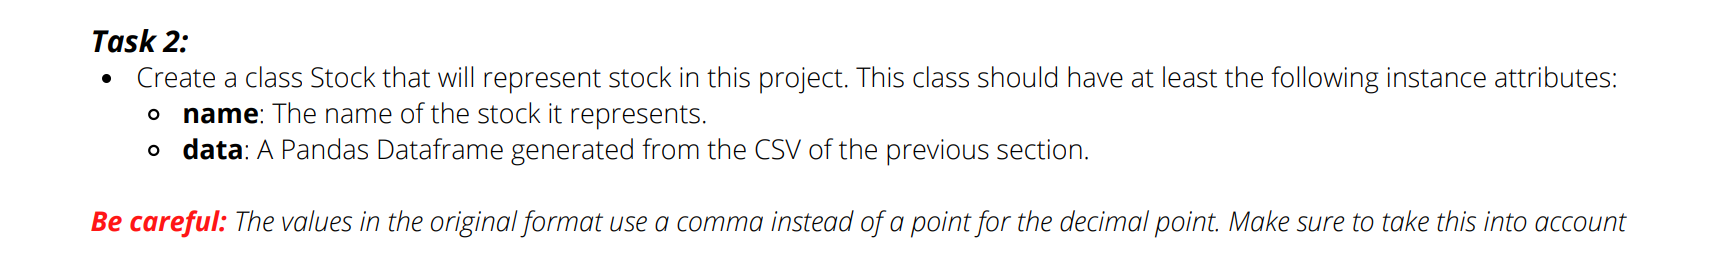

In [10]:
# we define a class Stock which has a constructor method __init__ that takes in two parameters, path and name.
# The path and name attributes are assigned to the corresponding parameter values.
class Stock: 
    def __init__(self,path,name):
        self.name = name
        self.path = path
        self.data = return_csv(path,name)[1] # initializing the data of the stock

# Test :
path = "C:/Users/21261/Desktop/Data/CIH.aspx"
name = "CIH"
c1 = Stock(path,name) # create an instance of the stock  class
c1.data # calling the data 

Date  Closing  Adjusted  Evolution  Quantity      Volume
0   2020-01-04   250.00    250.00      -1.19      5919  1479750.00
1   2020-01-06   244.60    244.60      -1.94       128    31355.60
2   2020-01-07   249.90    249.90       2.00      1100   269987.55
3   2020-01-09   259.00    259.00       1.57      3501   891075.50
4   2020-01-10   248.85    248.85      -0.06         8     1990.80
..         ...      ...       ...        ...       ...         ...
727 2022-12-05   335.00    335.00       0.00       105    34685.70
728 2022-12-07   310.00    310.00       0.00         0        0.00
729 2022-12-08   314.90    314.90      -0.03     15161  4701034.00
730 2022-12-09   319.00    319.00       0.31        10     3190.00
731 2022-12-10   310.00    310.00      -2.19        56    17360.00

[732 rows x 6 columns]

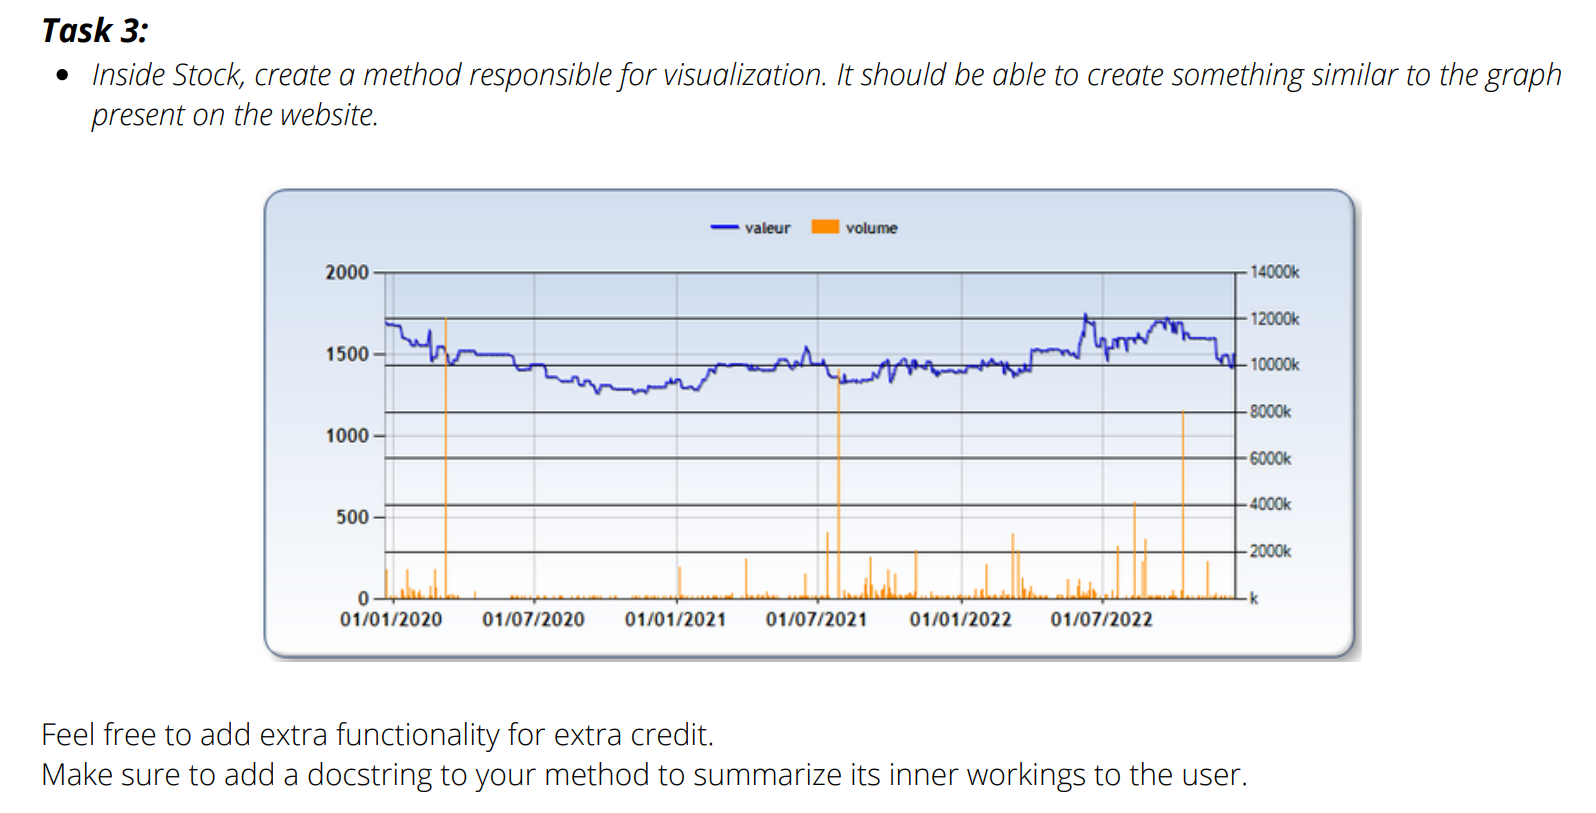

In [11]:
class Stock:
    def __init__(self,path,name): # constructor method that takes in the name and path of the stock
        self.name = name 
        self.path = path
        self.data = return_csv(path,name)[1]  # initializing the data of the stock
    def visualize(self): 
        trace1 = go.Scatter(x=self.data.Date, y=self.data.Closing, name='Closing Price') # create a trace for the closing price
        trace2 = go.Scatter(x=self.data.Date, y=self.data.Volume, name='Volume', yaxis='y2')  #create a trace for the volume price
        data = [trace1, trace2]
        layout = go.Layout(title='Stock Prices', xaxis=dict(title='Date'),
                           yaxis=dict(title='Closing Price'), yaxis2=dict(title='Volume', overlaying='y', side='right'))
        
        # to add shaded area 
        layout.update(shapes=[
            dict(
                type='rect',
                x0='2022-01-01',
                y0=0,
                x1='2022-12-31',
                y1=self.data["Closing"].max(),
                #fillcolor='lightgray',
                opacity=0
            )
        ])
        fig = go.Figure(data=data, layout=layout)
        pyo.iplot(fig) # plot the figure using plotly

In [12]:
path = "C:/Users/21261/Desktop/Data/CIH.aspx"
name = "CIH"
s = Stock(path,name)
s.visualize()

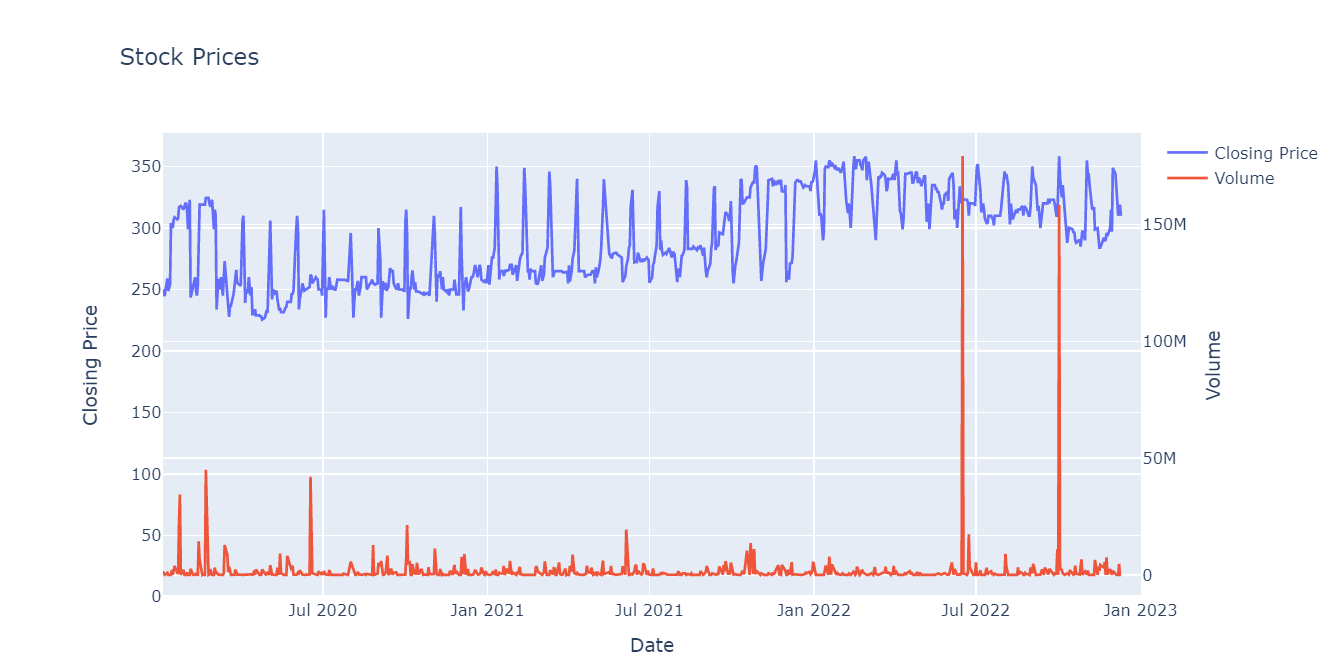

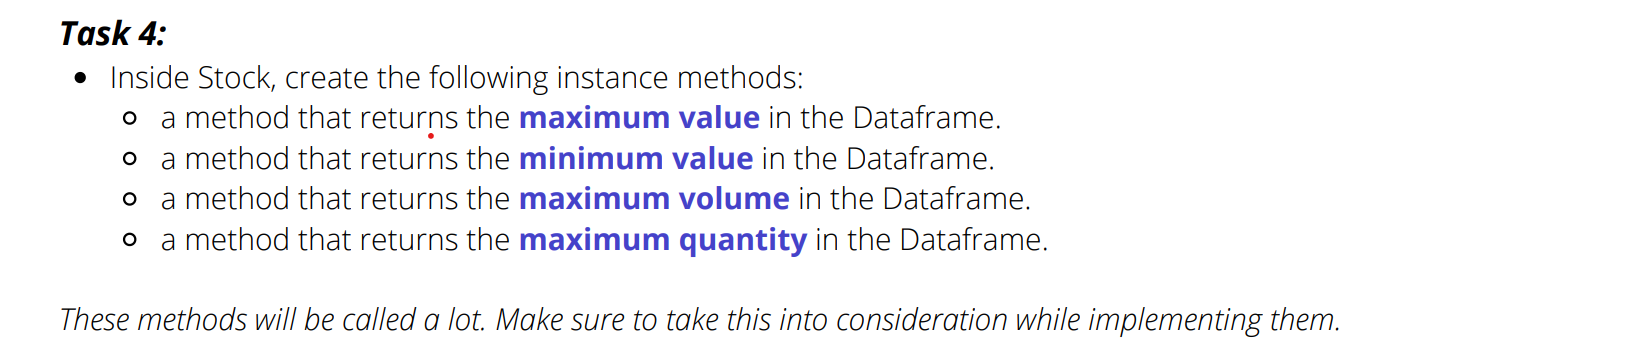

In [13]:
class Stock:
    def __init__(self,name,path):
        self.name = name
        self.path = path
        self.data = return_csv(path,name)[1]
    def max_value(self):
        return self.data.max() # this method returns the maximum value in the Dataframe
    def min_value(self):
        return self.data.min() # this method returns the minimum value in the Dataframe
    def max_volume(self):
        return self.data.Volume.max()  # this method returns the maximum volume in the dataframe
    def max_quantity(self):
        return self.data.Quantity.max()  # this method returns the maximum quantity in the Dataframe

In [14]:
path = "C:/Users/21261/Desktop/Data/BANK OF AFRICA.aspx"
name = 'bank_of_africa'
s = Stock(name,path)

In [15]:
s.max_value()

Date         2022-12-10 00:00:00
Closing                    223.0
Adjusted                  219.59
Evolution                   8.38
Quantity                 3712910
Volume               566242942.7
dtype: object

In [16]:
s.min_value()

Date         2020-01-04 00:00:00
Closing                   121.55
Adjusted                  119.69
Evolution                  -9.91
Quantity                       0
Volume                       0.0
dtype: object

In [17]:
s.max_volume()

566242942.7

In [18]:
s.max_quantity()

3712910

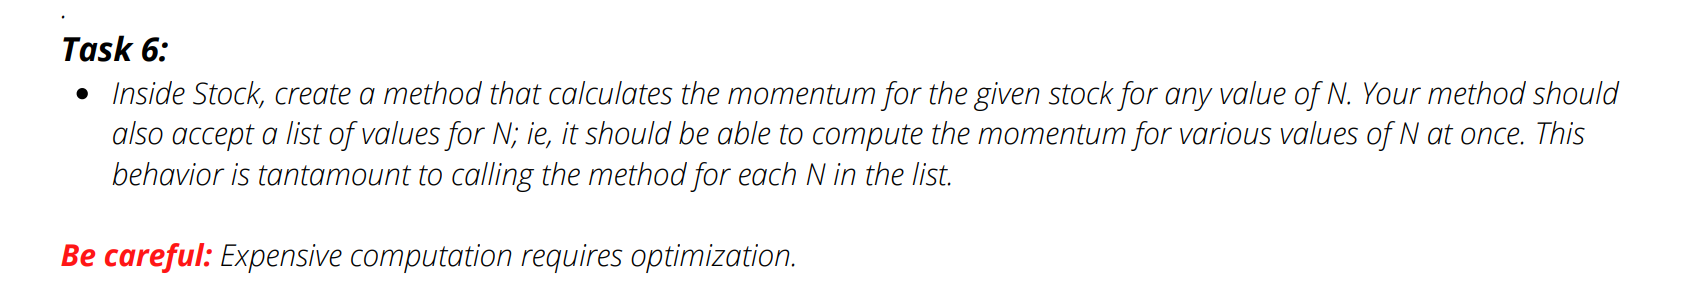

In [19]:
class Stock:
    def __init__(self,name,path):
        self.name = name
        self.path = path
        self.data = return_csv(path,name)[1]
    def momentum(self,N_values): # method that calculates the momentum for various values of the list N_values
        n = len(self.data) # n is the len of our dataset
        m = [None]*n # m is a list of size n (len of our data)
        for N in N_values: # for each N in list N_values
            for i in range(n): # for each line in our data
                if i<N: # we cant compute the momentum if i is less than N
                    m[i] = np.nan
                else:
                    m[i] = self.data.Closing[i] - self.data.Closing[i-N]
                self.data[f'Momentum_{N}'] = m
        return self.data #return the data with momentum added as new column

In [20]:
path = "C:/Users/21261/Desktop/Data/BANK OF AFRICA.aspx"
name = 'bank_of_africa'
s = Stock(name,path)

In [21]:
s.momentum([1,2,3,4])

Date  Closing  Adjusted  Evolution  Quantity      Volume  \
0   2020-01-04    150.0    147.71      -3.85       125    19255.75   
1   2020-01-06    136.0    133.92       0.74       210    28370.00   
2   2020-01-07    140.0    137.86       0.00      6223   871295.95   
3   2020-01-09    130.6    128.60       0.46     13287  1746257.40   
4   2020-01-10    129.0    127.03       2.38        89    11481.00   
..         ...      ...       ...        ...       ...         ...   
727 2022-12-05    193.0    190.05      -1.03      1621   312969.85   
728 2022-12-07    185.0    182.17       0.00      5552  1027120.00   
729 2022-12-08    180.0    177.25      -1.10      9284  1665194.55   
730 2022-12-09    180.0    177.25       0.00     14012  2522178.00   
731 2022-12-10    175.0    175.00      -1.13      3088   540337.50   

     Momentum_1  Momentum_2  Momentum_3  Momentum_4  
0           NaN         NaN         NaN         NaN  
1         -14.0         NaN         NaN         NaN  
2           4.0       -10.0         NaN         NaN  
3          -9.4        -5.4       -19.4         NaN  
4          -1.6       -11.0        -7.0       -21.0  
..          ...         ...         ...         ...  
727        -6.5         5.0        28.0        27.5  
728        -8.0       -14.5        -3.0        20.0  
729        -5.0       -13.0       -19.5        -8.0  
730         0.0        -5.0       -13.0       -19.5  
731        -5.0        -5.0       -10.0       -18.0  

[732 rows x 10 columns]

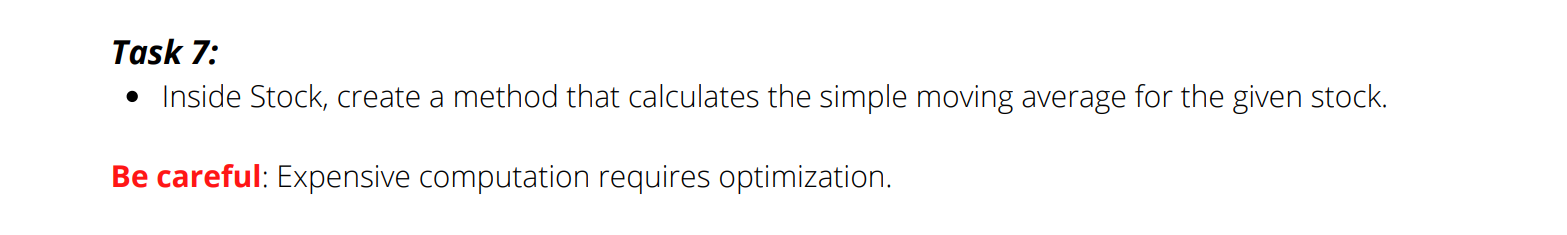

In [22]:
class Stock:
    def __init__(self,name,path):
        self.name = name
        self.data = return_csv(path,name)[1]

    def max_value(self):
        return self.data.max()
    def min_value(self):
        return self.data.min()
    def max_volume(self):
        return self.data.Volume.max()
    def max_quantity(self):
        return self.data.Quantity.max()
    
    def momentum(self,N_values):
        n = len(self.data)
        m = [None]*n
        for N in N_values:
            for i in range(n):
                if i<N:
                    m[i] = np.nan
                else:
                    m[i] = self.data.Closing[i] - self.data.Closing[i-N]
                self.data[f'Momentum_{N}'] = m
        return self.data
    def moving_average(self,ndays): # method that calculates the moving average for a given number of days
        self.data['SMA_{}'.format(ndays)] = self.data.iloc[:,1].rolling(window=ndays).mean()
        return self.data

In [23]:
path = "C:/Users/21261/Desktop/Data/BANK OF AFRICA.aspx"
name = 'bank_of_africa'
s = Stock(name,path)

In [24]:
s.moving_average(10)
s.momentum([10])SMA_10

Date  Closing  Adjusted  Evolution  Quantity      Volume  SMA_10  \
0   2020-01-04    150.0    147.71      -3.85       125    19255.75     NaN   
1   2020-01-06    136.0    133.92       0.74       210    28370.00     NaN   
2   2020-01-07    140.0    137.86       0.00      6223   871295.95     NaN   
3   2020-01-09    130.6    128.60       0.46     13287  1746257.40     NaN   
4   2020-01-10    129.0    127.03       2.38        89    11481.00     NaN   
..         ...      ...       ...        ...       ...         ...     ...   
727 2022-12-05    193.0    190.05      -1.03      1621   312969.85  173.75   
728 2022-12-07    185.0    182.17       0.00      5552  1027120.00  175.75   
729 2022-12-08    180.0    177.25      -1.10      9284  1665194.55  177.25   
730 2022-12-09    180.0    177.25       0.00     14012  2522178.00  178.70   
731 2022-12-10    175.0    175.00      -1.13      3088   540337.50  179.65   

     Momentum_10  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
727         30.0  
728         20.0  
729         15.0  
730         14.5  
731          9.5  

[732 rows x 8 columns]

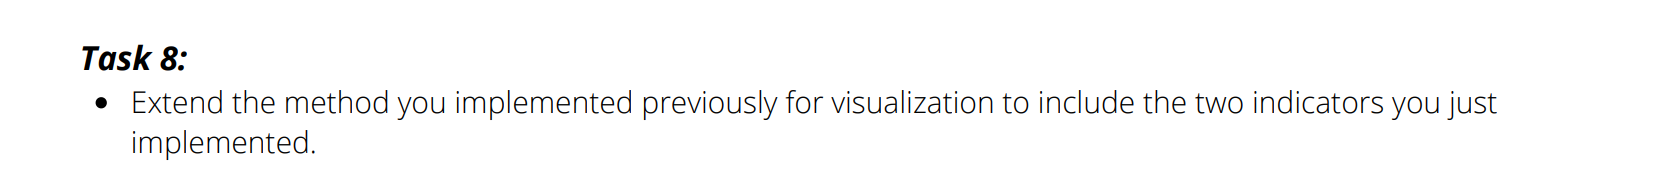

In [25]:
## final class
class Stock:
    def __init__(self,name,path):
        self.name = name
        self.data = return_csv(path,name)[1]

    def max_value(self):
        return self.data.max()
    def min_value(self):
        return self.data.min()
    def max_volume(self):
        return self.data.Volume.max()
    def max_quantity(self):
        return self.data.Quantity.max()
    
    def momentum(self,N_values):
        self.N_values = N_values
        n = len(self.data)
        m = [None]*n
        for N in N_values:
            for i in range(n):
                if i<N:
                    m[i] = np.nan
                else:
                    m[i] = self.data.Closing[i] - self.data.Closing[i-N]
                self.data[f'Momentum_{N}'] = m
        return self.data
    def moving_average(self,ndays):
        self.ndays = ndays
        self.data['SMA_{}'.format(ndays)] = self.data.iloc[:,1].rolling(window=ndays).mean()
        return self.data
    def visualize_mom_sma(self):  # this method is used to compare both methods in the same plot
        graph1 = go.Scatter(x=self.data["Date"], y=self.data["Momentum_{}".format(self.ndays)], 
                            name="Momentum"+"={}".format(self.ndays))
        graph2 = go.Scatter(x=self.data["Date"], y=self.data["SMA_{}".format(self.ndays)], 
                            name="sma"+"={}".format(self.ndays), yaxis='y2')
        data = [graph1, graph2 ]
        layout = go.Layout(title=self.name, xaxis=dict(title='Date'),
                           yaxis=dict(title="momentum"+"={}".format(self.N_values[0])),
                           yaxis2=dict(title="sma"+"={}".format(self.ndays), overlaying='y', side='right'),
                           yaxis3=dict(title='Closing Price'))
        layout.update(shapes=[dict(type='rect',x0='2022-01-01',y0=0,x1='2022-12-31',
                                   y1=self.data["Closing"].max(),opacity=0)])
        fig = go.Figure(data=data, layout=layout)
        pyo.iplot(fig)

In [26]:
path = "C:/Users/21261/Desktop/Data/BANK OF AFRICA.aspx"
name = 'bank_of_africa'
s = Stock(name,path)
s.momentum([30])
s.moving_average(30)
s.visualize_mom_sma()

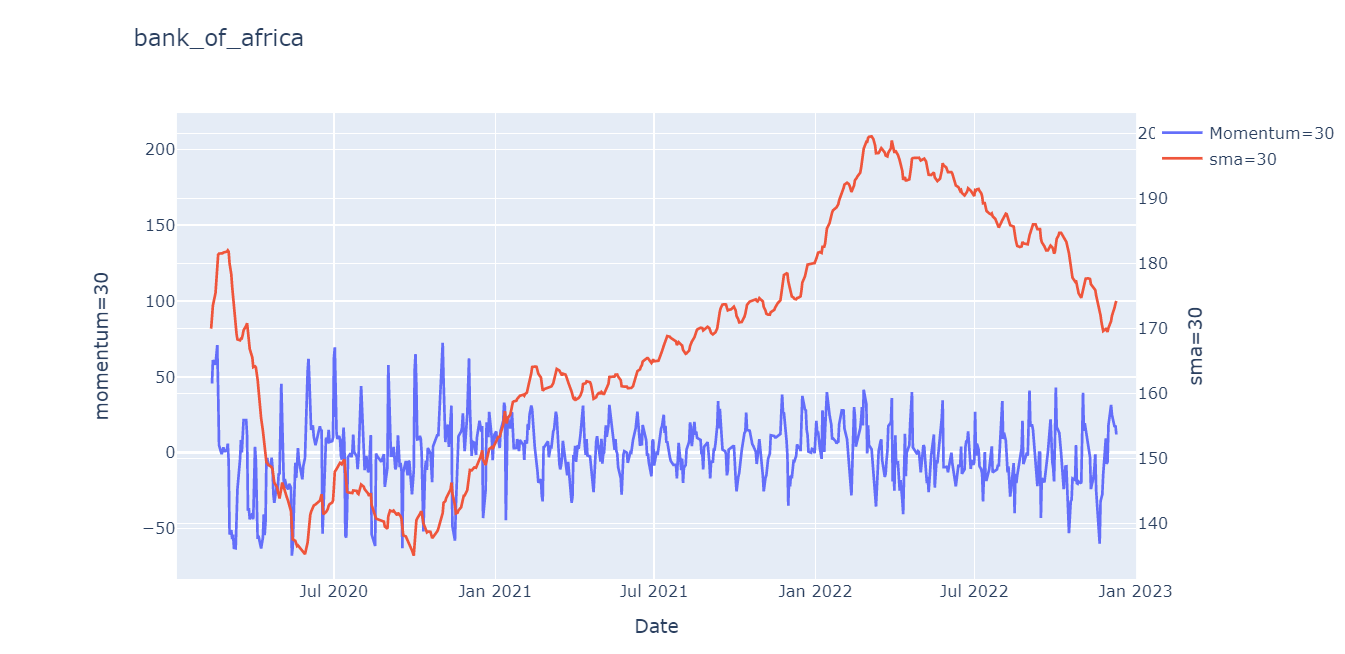

In [27]:
class Stock:
    def __init__(self,name,path):
        self.name = name
        self.data = return_csv(path,name)[1]

    def max_value(self):
        return self.data.max()
    def min_value(self):
        return self.data.min()
    def max_volume(self):
        return self.data.Volume.max()
    def max_quantity(self):
        return self.data.Quantity.max()
    
    def momentum(self,N_values):
        self.N_values = N_values
        n = len(self.data)
        m = [None]*n
        for N in N_values:
            for i in range(n):
                if i<N:
                    m[i] = np.nan
                else:
                    m[i] = self.data.Closing[i] - self.data.Closing[i-N]
                self.data[f'Momentum_{N}'] = m
        return self.data
    def moving_average(self,ndays):
        self.ndays = ndays
        self.data['SMA_{}'.format(ndays)] = self.data.iloc[:,1].rolling(window=ndays).mean()
        return self.data
    def visualize_mom_sma(self):  # this method is used to compare both methods in the same plot
        graph1 = go.Scatter(x=self.data["Date"], y=self.data["Momentum_{}".format(self.ndays)], 
                            name="Momentum"+"={}".format(self.ndays))
        graph2 = go.Scatter(x=self.data["Date"], y=self.data["SMA_{}".format(self.ndays)], 
                            name="sma"+"={}".format(self.ndays), yaxis='y2')
        data = [graph1, graph2 ]
        layout = go.Layout(title=self.name, xaxis=dict(title='Date'),
                           yaxis=dict(title="momentum"+"={}".format(self.N_values[0])),
                           yaxis2=dict(title="sma"+"={}".format(self.ndays), overlaying='y', side='right'),
                           yaxis3=dict(title='Closing Price'))
        layout.update(shapes=[dict(type='rect',x0='2022-01-01',y0=0,x1='2022-12-31',
                                   y1=self.data["Closing"].max(),opacity=0)])
        fig = go.Figure(data=data, layout=layout)
        pyo.iplot(fig)
    def visualize_mom_sma_closing(self): # this method is used to compare both methods in the same plot with the closing price
        graph1 = go.Scatter(x=self.data["Date"], y=self.data["Momentum_{}".format(self.ndays)], 
                            name="Momentum"+"={}".format(self.ndays))
        graph2 = go.Scatter(x=self.data["Date"], y=self.data["SMA_{}".format(self.ndays)], 
                            name="sma"+"={}".format(self.ndays), yaxis='y2')
        graph3 = go.Scatter(x=self.data["Date"], y=self.data["Closing"], name='Closing Price')
        data = [graph1, graph2,graph3]
        layout = go.Layout(title=self.name, xaxis=dict(title='Date'),
                           yaxis=dict(title="momentum"+"={}".format(self.N_values[0])),
                           yaxis2=dict(title="sma"+"={}".format(self.ndays), overlaying='y', side='right'),
                           yaxis3=dict(title='Closing Price', overlaying='y', side='right'))
        layout.update(shapes=[dict(type='rect',x0='2022-01-01',y0=0,x1='2022-12-31',
                                   y1=self.data["Closing"].max(),opacity=0)])
        fig = go.Figure(data=data, layout=layout)
        pyo.iplot(fig)


In [28]:
path = "C:/Users/21261/Desktop/Data/BANK OF AFRICA.aspx"
name = 'bank_of_africa'
s = Stock(name,path)
s.momentum([40])
s.moving_average(40)
s.visualize_mom_sma_closing()

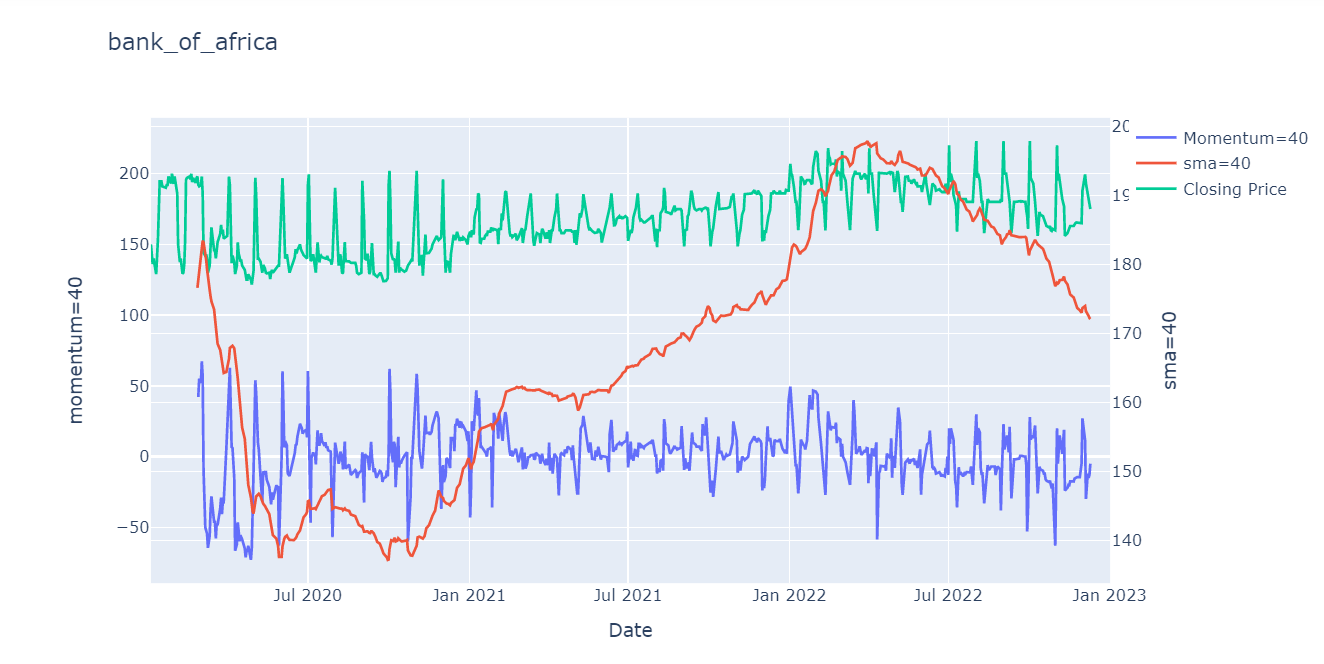